## Spiking behaviour of the proposed neuron models

In [1]:
import seaborn as sns
from scipy.special import erf
import pylab
import numpy as np
import matplotlib.pyplot as plt
import nest
import csv
import pandas as pd
from scipy.spatial import KDTree

In [2]:
#

In [3]:
# import multimeter and spikedetector data from CSVs
vm1 = (pd.read_csv("vm1.csv", header = None)).to_numpy()
vm2 = pd.read_csv("vm2.csv", header = None).to_numpy()
vm3 = pd.read_csv("vm3.csv", header = None).to_numpy()

sd1 = pd.read_csv("sd1.csv", names = np.arange(1,55), header = None).to_numpy()
sd2 = pd.read_csv("sd2.csv", names = np.arange(1,55), header = None).to_numpy()
sd3 = pd.read_csv("sd3.csv", names = np.arange(1,55), header = None).to_numpy()

In [4]:
# Fig 5. A) Raster plot of 300 neurons randomly selected among the 3 populations
def raster_plot(s=[]):

    plt.rcParams["figure.figsize"] = (20,10)
    for i in range(s.shape[0]):
        
        if i % 100 >= 80:
            pylab.plot(s[i], [i]*len(s[i]), ".", color="gray", markersize=2)
        else:
            pylab.plot(s[i], [i]*len(s[i]), ".", color="black", markersize=2)


    plt.axhspan(0,80,facecolor="lightblue",alpha=0.2, label = "alpha")
    plt.axhspan(80,100,facecolor="lightblue",alpha=0.1)
    plt.axhspan(100,180,facecolor="lightgreen",alpha=0.2, label = "beta")
    plt.axhspan(180,200,facecolor="lightgreen",alpha=0.1)
    plt.axhspan(200,280,facecolor="blue",alpha=0.2, label = "gamma")
    plt.axhspan(280,300,facecolor="blue",alpha=0.1)
    
    pylab.title("Raster plot")
    pylab.xlabel("time in ms")
    pylab.ylabel("neuron ID")
    pylab.legend()
    pylab.show()

In [5]:
def plot_spikes(s=[]):
    plt.rcParams["figure.figsize"] = (20,10)
    pylab.figure()
    i1 = np.random.randint(100)
    i2 = np.random.randint(100, 200)
    i3 = np.random.randint(200, 300)
    
    ts1 = s[i1]
    ts1 = ts1[~np.isnan(ts1)]
    ts2 = s[i2]
    ts2 = ts2[~np.isnan(ts2)]
    ts3 = s[i3]
    ts3 = ts3[~np.isnan(ts3)]

    tree1 = KDTree(np.reshape(ts1, (len(ts1), 1)))
    tree2 = KDTree(np.reshape(ts2, (len(ts2), 1)))
    
    nn_dist_12, _ = tree1.query(np.reshape(ts2, (len(ts2), 1)))
    nn_dist_13, _ = tree1.query(np.reshape(ts3, (len(ts3), 1)))
    nn_dist_23, _ = tree2.query(np.reshape(ts3, (len(ts3), 1)))
    
   
    pylab.plot(ts2[1:], nn_dist_12[1:], color = "red")
    pylab.plot(ts3[1:], nn_dist_13[1:], color = "darkblue", alpha = 0.7)
    pylab.plot(ts3[1:], nn_dist_23[1:], color = "blue", alpha = 0.7)
    
    pylab.plot(ts1, np.full((len(ts1)), 1), ".")
    pylab.plot(ts2, np.full((len(ts2)), 1), ".")
    pylab.plot(ts3, np.full((len(ts3)), 1), ".")
    
    pylab.title("Spike distances between neurons")
    pylab.legend(["alpha-beta", "alpha-gamma", "beta-gamma"])
    pylab.xlabel("t")
    pylab.ylabel("Distance")
    pylab.show()

In [6]:
def coinc_hists(v=[]):
    
    start_idx = 100
    end_idx = 400
    threshold = .008
    
    offsets = np.arange(-80, 80, 2)
    hist12 = np.empty((300, len(offsets)))
    hist13 = np.empty((300, len(offsets)))
    hist23 = np.empty((300, len(offsets)))
    
    for sample in range(300):
    
        idx1 = np.random.randint(100)
        idx2 = np.random.randint(100, 200)
        idx3 = np.random.randint(200, 300)

        Vms1 = v[idx1]
        Vms2 = v[idx2]
        Vms3 = v[idx3]


        for i, offset in enumerate(offsets):
            diff12 = Vms1[start_idx : end_idx] - Vms2[start_idx + offset: end_idx + offset]
            diff13 = Vms1[start_idx : end_idx] - Vms3[start_idx + offset: end_idx + offset]
            diff23 = Vms2[start_idx : end_idx] - Vms3[start_idx + offset: end_idx + offset]
            hist12[sample, i] = len(diff12[np.abs(diff12) < threshold])
            hist13[sample, i] = len(diff13[np.abs(diff13) < threshold])
            hist23[sample, i] = len(diff23[np.abs(diff23) < threshold])
            
    hist12_mean = np.mean(hist12, axis=0)
    hist13_mean = np.mean(hist13, axis=0)
    hist23_mean = np.mean(hist23, axis=0)
    
    fig, ax = plt.subplots(1,3, sharey = True)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    
        
    ax[0].set_title("alpha & beta")
    ax[0].bar(offsets, hist12_mean, color = ["#0B610B","#088A08"], width=2.0)
    ax[0].axvline(x=0, color = "red")
  
    ax[1].set_title("alpha & gamma")
    ax[1].bar(offsets, hist13_mean, color = ["#0B6138","#088A68"], width=2.0)
    ax[1].axvline(x=0, color = "red")


    ax[2].set_title("beta & gamma")
    ax[2].bar(offsets, hist23_mean, color = ["#688A08","#86B404"], width=2.0)
    ax[2].axvline(x=0, color = "red")


    pylab.show()


In [7]:
def firing_hists(s=[]):
    
    plt.rcParams["figure.figsize"] = (20,10)

    ts1 = []      
    ts2 = []      
    ts3 = []    
    
    for i in range(100):
        ts1.append(s[i])
        ts2.append(s[i+100])
        ts3.append(s[i+200])
        
    ts1 = np.hstack(ts1)
    ts2 = np.hstack(ts2)
    ts3 = np.hstack(ts3)
    
    bin_size = 1.
    bins = np.arange(0, 1000, bin_size)
    
    hist1, _ = np.histogram(ts1, bins=bins)
    hist2, _ = np.histogram(ts2, bins=bins)
    hist3, _ = np.histogram(ts3, bins=bins)
    
    bin_means = (bins - bin_size / 2)[1:]
    
    pylab.figure()
    pylab.plot(bin_means, hist1, color = "#688A08")
    pylab.plot(bin_means, hist2, color = "#0B615E")
    pylab.plot(bin_means, hist3, color = "lightblue")
    pylab.legend(["alhpa", "beta", "gamma"])
    pylab.xlabel("t")
    pylab.ylabel("PTSH")
    pylab.title("Firing histogram of each subpopulation")
    pylab.show()

In [8]:
def violin_plots(v):
    
    plt.rcParams["figure.figsize"] = (20,10)
 
    pal = sns.cubehelix_palette(len(v)*3, rot=-.5, dark=.3)
    
    data = []
    for vm in v:
        
        idx1 = np.random.randint(100)
        idx2 = np.random.randint(100,200)
        idx3 = np.random.randint(200,300)

        m1 = vm[idx1]
        m2 = vm[idx2]
        m3 = vm[idx3]
    

        data.append(m1-m2)
        data.append(m1-m3)
        data.append(m2-m3)
    
    sns.violinplot(data=data, palette=pal)

### Synchronization behaviour of single interconnected HH - Neurons  

#### 1.Three HH cells in a circuit with reciprocal delayed synaptic connections with constant axonal delays

- TODO: Introduction (results, goals)

In this first scenario three HH - neurons are arranged in a circuit with reciprocal delayed synaptic connections. Apart from their interconnection all neurons are in a toinic firing mode with a natural period of 14.7ms due to an intracellular constant stimulation of 10 $\mu$A/cm$^2$. 
Further, the conduction delays are set to 8ms and the initial phase of each neuron is randomly chosen.

In [9]:
# TODO: Fig 1 in the paper, simple voltage plot

#### 2. Three HH cells in a circuit with reciprocal delayed synaptic connections with varying axonal delays among the connections

Two scenarios were studied: one in which the neurons were directly coupled via excitatory synapses (dashed line) and a second one in which the 2 neurons interacted through a relay cell also in an excitatory manner (solid line).


In [10]:
# TODO: Different axonal delays, Fig 2????

#### 3. Three HH cells in a circuit with reciprocal delayed synaptic connections with excitatory and inhibitory interconnections

Robust zero lag synchrony among the outer neurons was also observed when the synaptic interaction between the cells was inhibitory instead of excitatory.

In [11]:
# TODO: Excitatory and inhibitory connections

#### 4. Three HH cells in a circuit with reciprocal delayed synaptic connections with delays displayed as a $\gamma$ distribution

We modeled the dispersion of axonal latencies by assuming that individual temporal delays of the arrivals of action
potentials (i.e., latency times) follow a $\gamma$ distribution

- mean delays between 3 and 10 ms


In [12]:
# TODO: distribution for delays

#### 5. Three HH cells in a circuit with reciprocal delayed synaptic connections with delays displayed as different $\gamma$ distributions per connection

We modeled the dispersion of axonal latencies by assuming that individual temporal delays of the arrivals of action
potentials (i.e., latency times) follow a $\gamma$ distribution

- mean delays between 3 and 10 ms



In [13]:
#TODO: Fig 4

### Synchronization behaviour of Populations of Distant Neurons

To check whether zero lag-correlated firing is thus induced among neurons in different populations, we built 3 large networks of sparsely connected excitatory and inhibitory IAF neurons.
We interconnected the 3 populations following the topology of the network motif under study, i.e., the mutual relaying of activities of 2 external populations onto an intermediate pool of relay neurons.

#### 1. Three networks without long - range interpopulation connections 

Consequently, each population initially exhibited spiking of their neurons in an incoherent and unsynchronized fashion with respect to neurons belonging to any of the other populations.

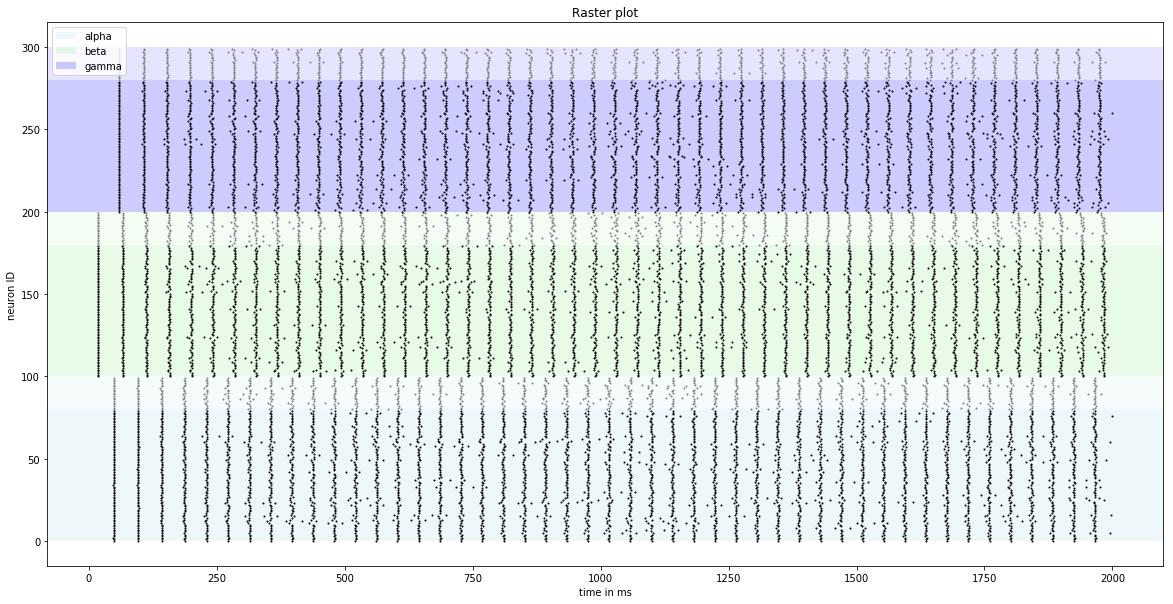

In [14]:
raster_plot(sd1)

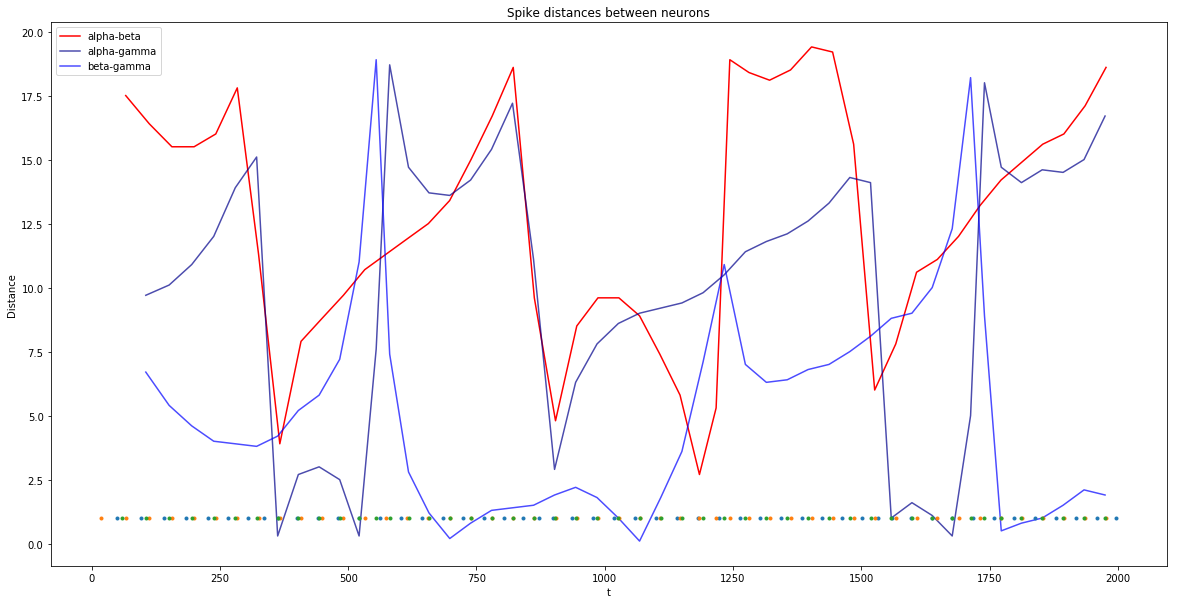

In [15]:
plot_spikes(sd1)

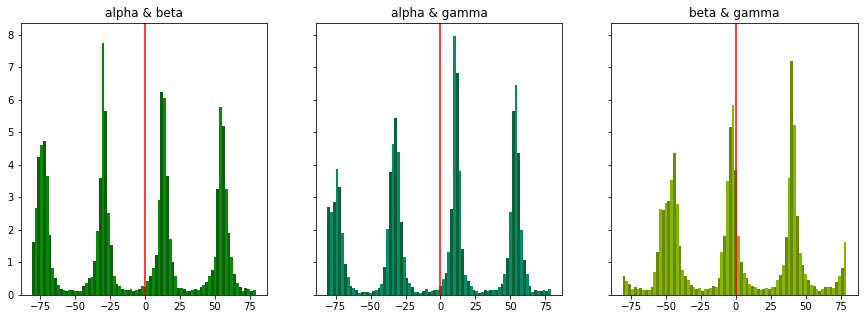

In [16]:
coinc_hists(vm1)

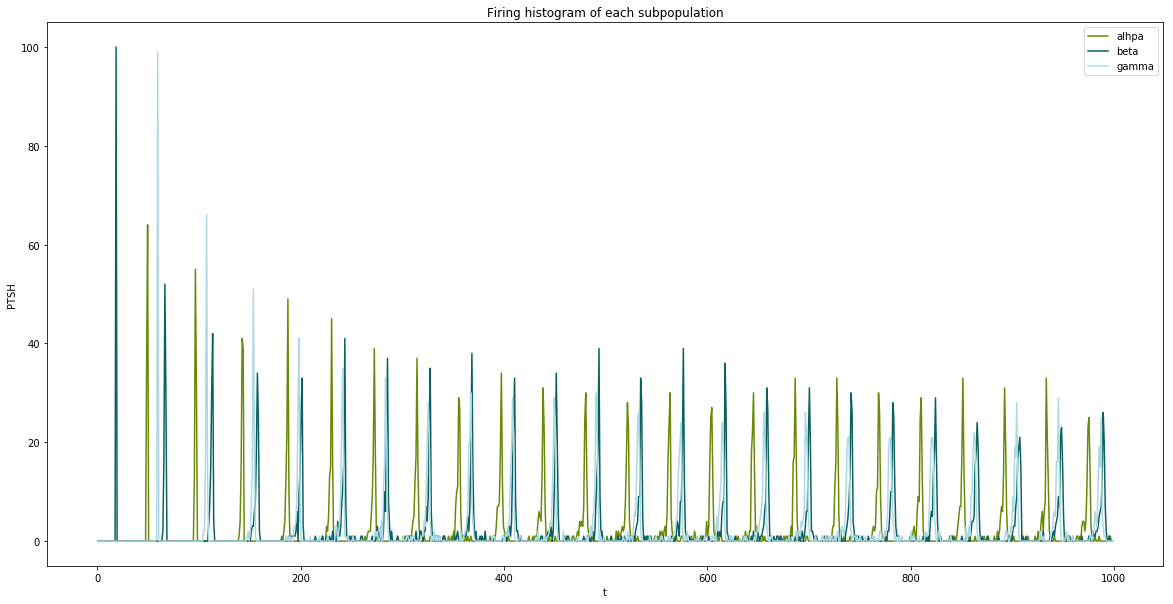

In [17]:
firing_hists(sd1)

#### 2. Three networks with long - range interpopulation connections 

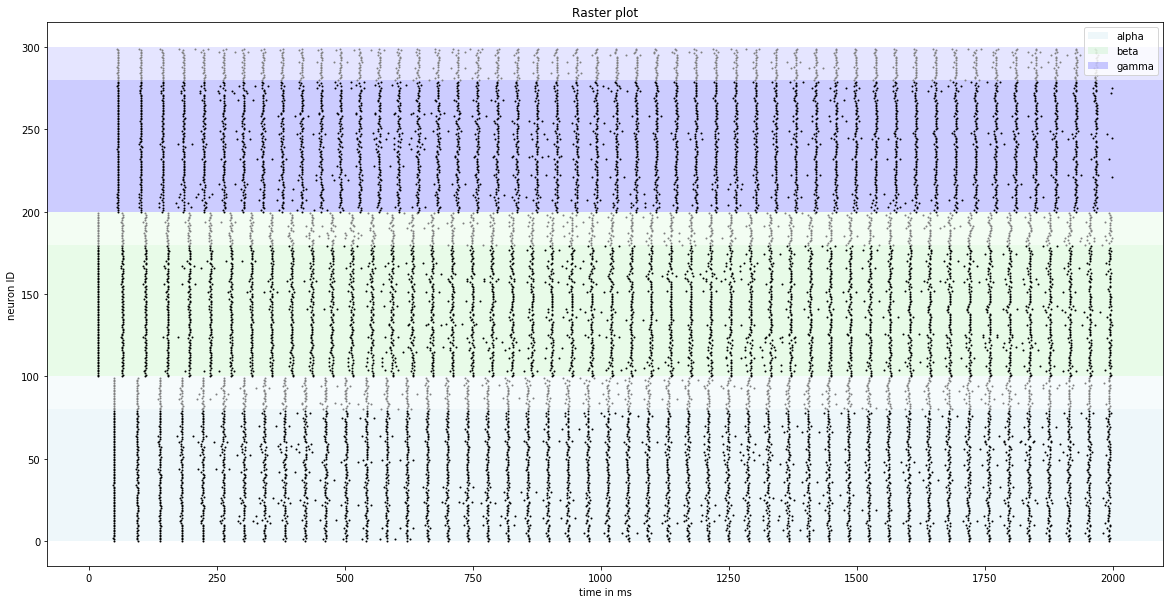

In [18]:
raster_plot(sd2)

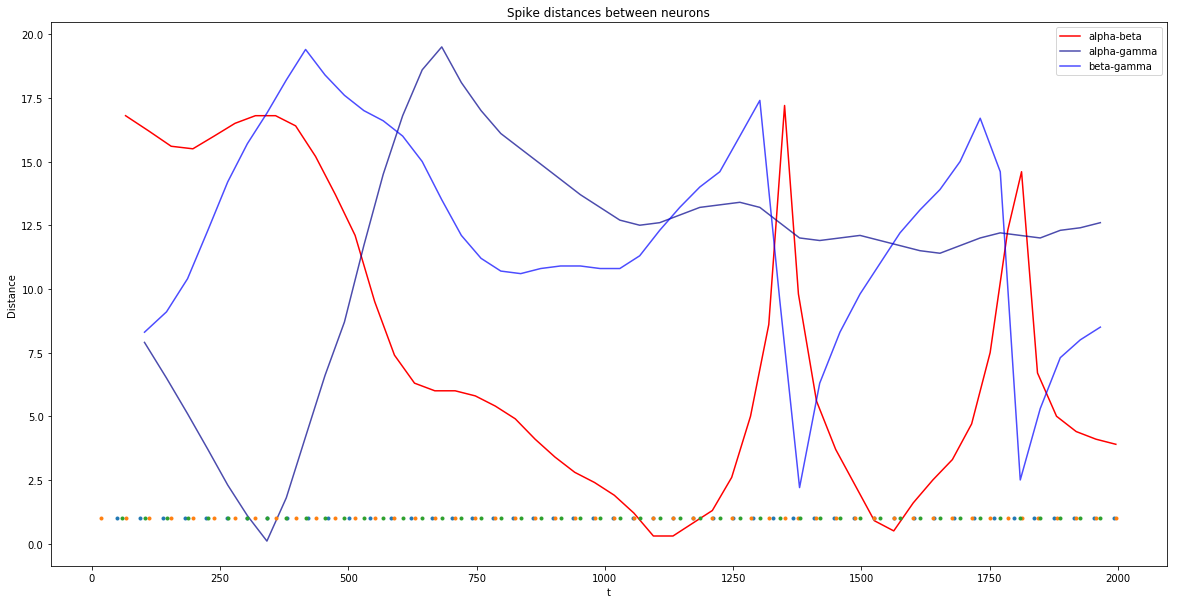

In [19]:
plot_spikes(sd2)

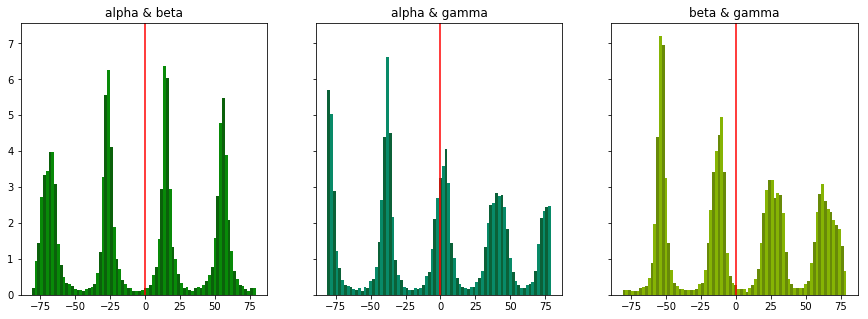

In [20]:
coinc_hists(vm2)

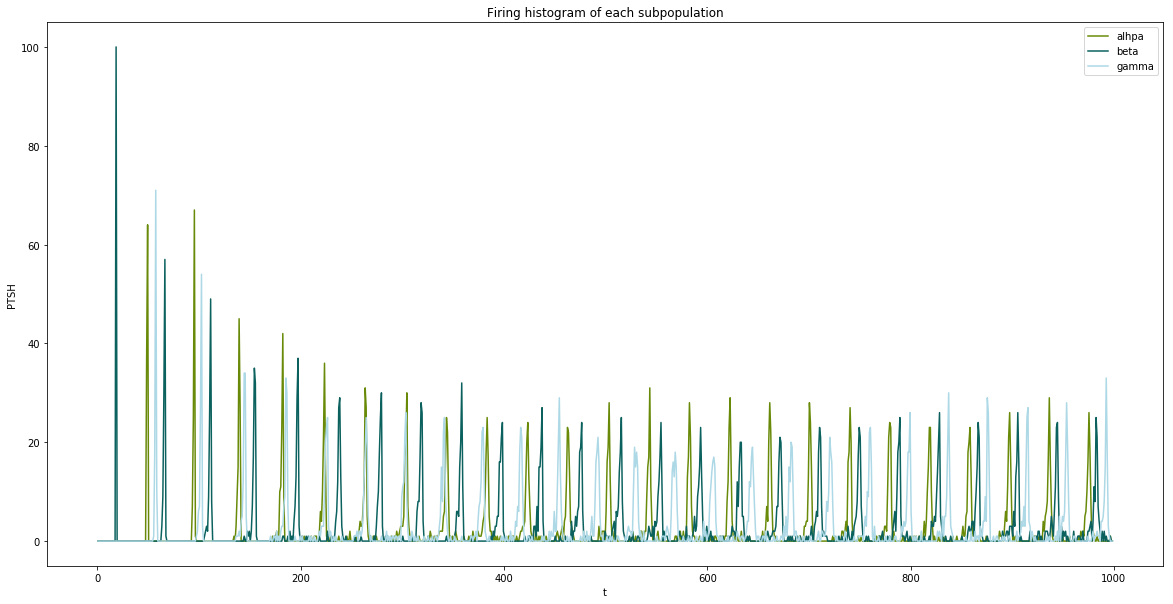

In [21]:
firing_hists(sd2)

#### 3. Three networks long - range interpopulation connections between the outer populations


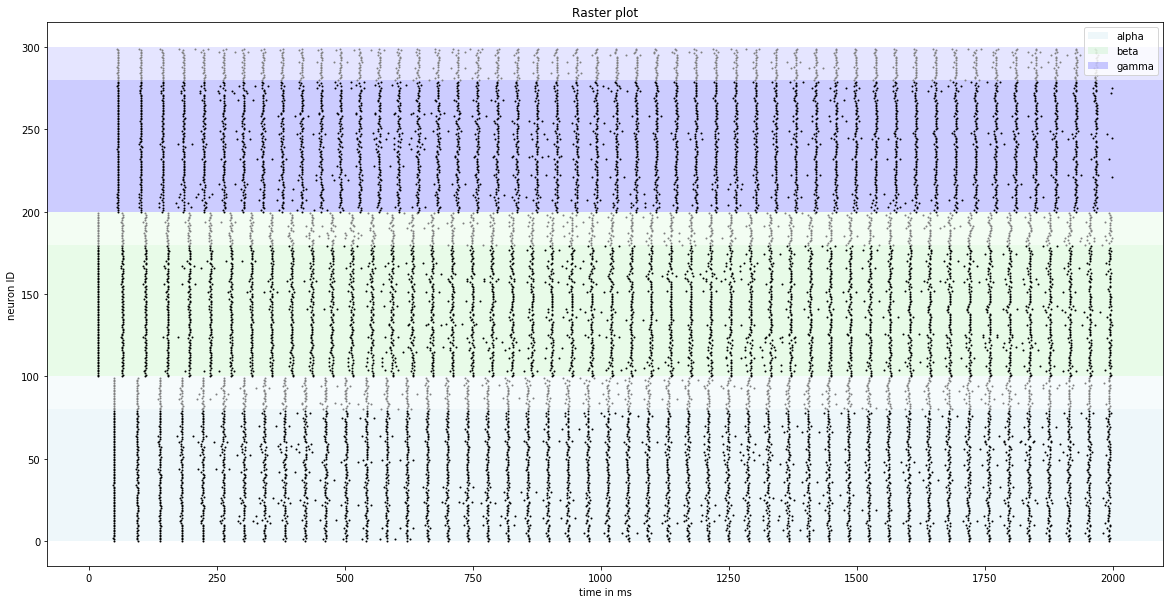

In [22]:
raster_plot(sd3)

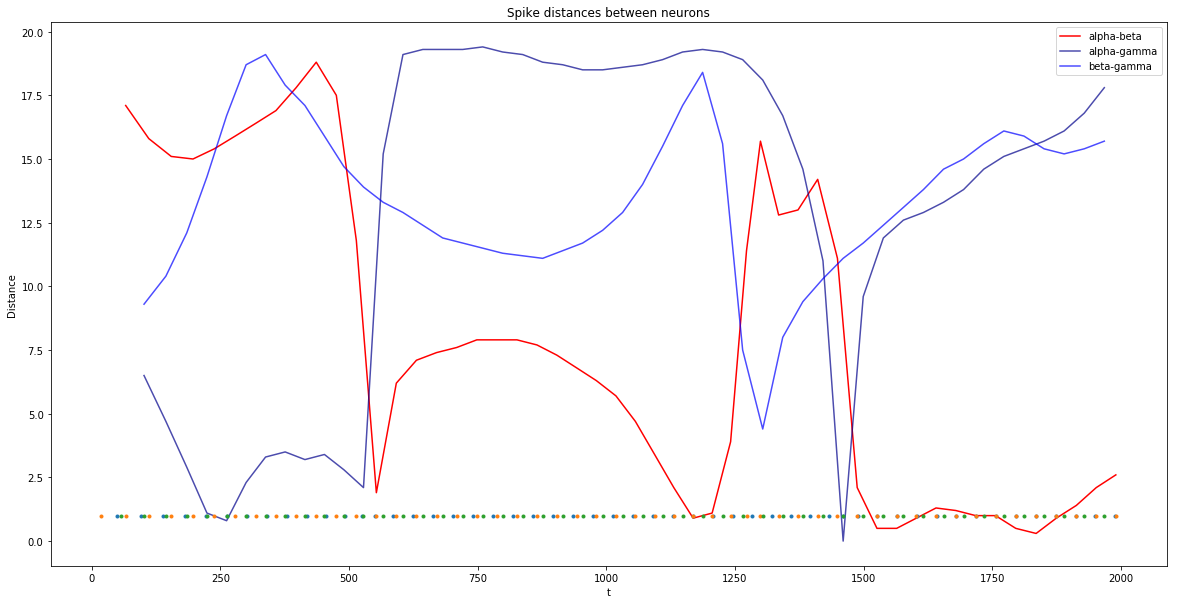

In [23]:
plot_spikes(sd3)

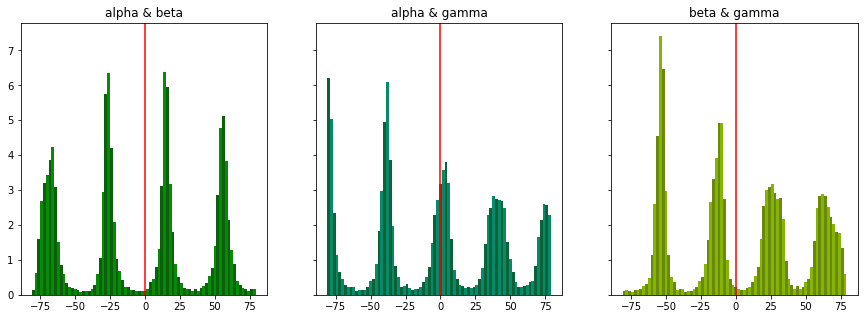

In [24]:
coinc_hists(vm3)

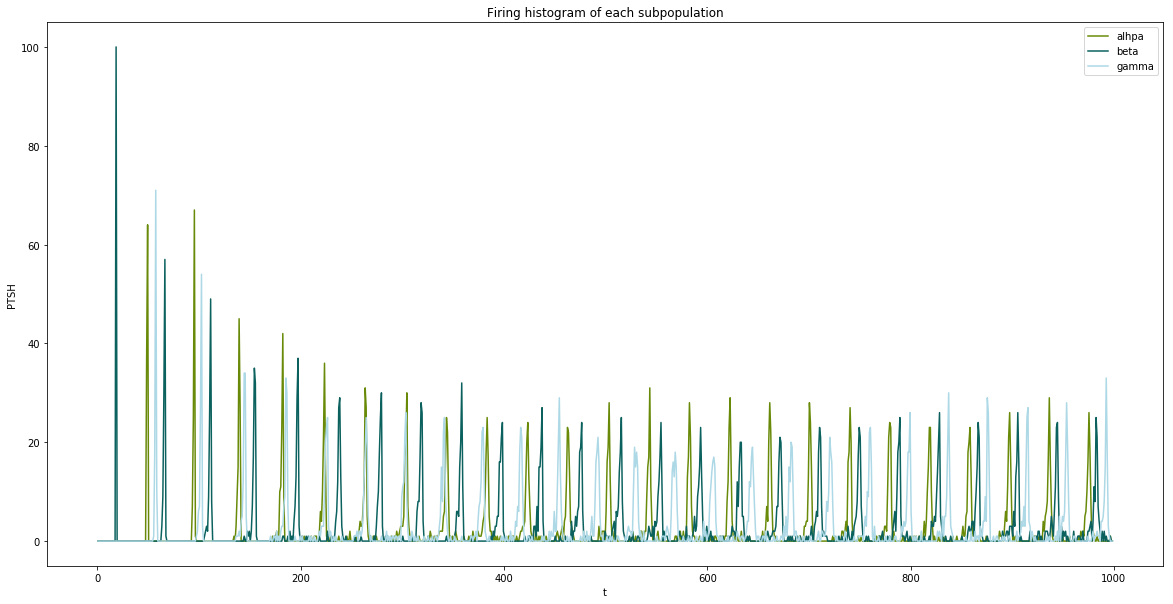

In [27]:
firing_hists(sd3)

### Summary

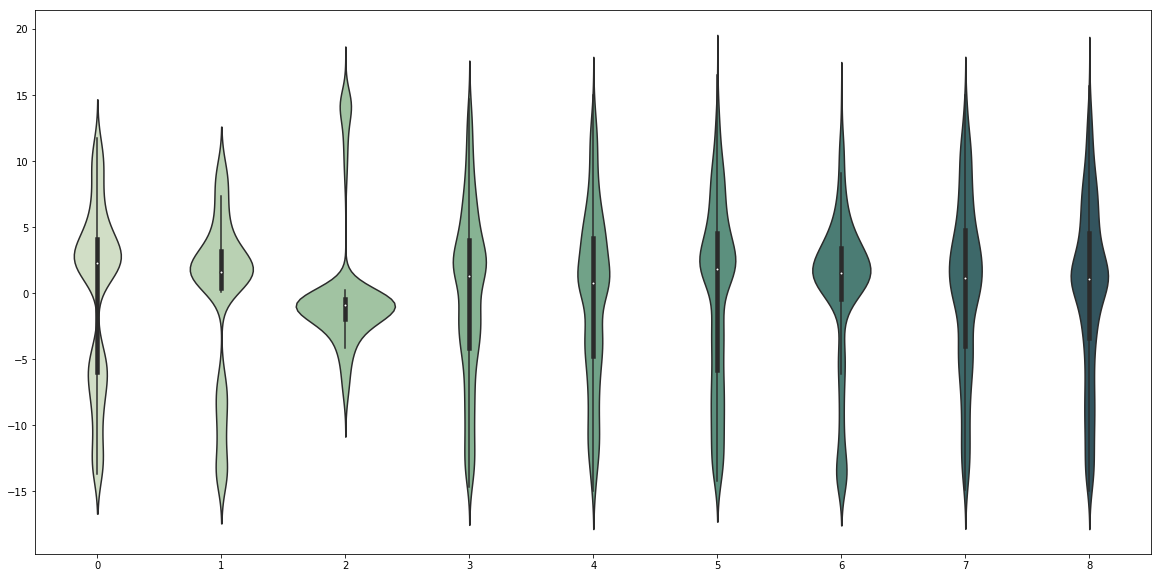

In [26]:
violin_plots([vm1,vm2,vm3])